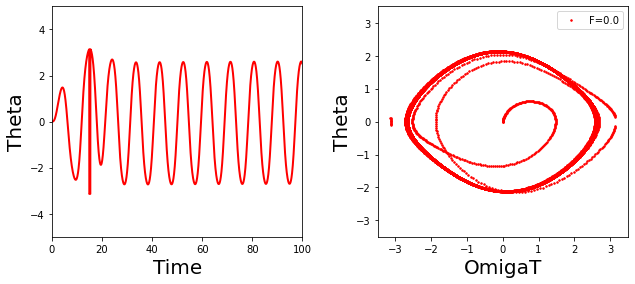

In [8]:
import numpy as np
import pylab as pl

t = 0.0
g=9.8
xl=9.8
q = 0.5
F=1.0  #1.35;1.44;1.465;1.5
W=2.0/3.0
dt=0.04
theta=0.0
omiga=0.
n = 20000

ThetaT0 = []
OmigaT0 = []
Time0 = []

for i in range(n):
    xk1=-(g/xl)*np.sin(theta)-q*omiga+F*np.sin(W*t)
    xl1=omiga
    xk2=-(g/xl)*np.sin(theta+dt/2.*xl1)-q*(omiga+dt/2.*xk1)+F*np.sin(W*t)
    xl2=omiga+dt/2.*xk1
    xk3=-(g/xl)*np.sin(theta+dt/2.*xl2)-q*(omiga+dt/2.*xk2)+F*np.sin(W*t)
    xl3=omiga+dt/2.*xk2
    xk4=-(g/xl)*np.sin(theta+dt*xl3)-q*(omiga+dt*xk3)+F*np.sin(W*t)
    xl4=omiga+dt*xk3

    omiga=omiga+dt/6.*(xk1+2*xk2+2*xk3+xk4)
    theta=theta+dt/6.*(xl1+2*xl2+2*xl3+xl4)

    if(theta > 3.1415927):
        theta=theta-3.1415927*2.
    if(theta < -3.1415927):
        theta=theta+3.1415927*2.

    t=t+dt
    ThetaT0.append(theta)
    OmigaT0.append(omiga)
    Time0.append(t)

fig = pl.figure(figsize=(10,4))

ax1 =fig.add_subplot(1,2,1)
ax2 =fig.add_subplot(1,2,2)

ax1.plot(Time0, ThetaT0, 'r-', label='F=0.0',linewidth=2.0)
ax2.plot(ThetaT0, OmigaT0, 'r.', label='F=0.0',ms=3.0)

pl.subplots_adjust(left=0.15,bottom=0.1,top=0.9,right=0.95, \
                   hspace=0.35,wspace=0.3)
ax1.set_ylabel(r'Theta', fontsize=20)
ax1.set_xlabel(r'Time', fontsize=20)
ax1.set_xlim(0,100)
ax1.set_ylim(-5.0,5.0)
ax2.set_ylabel(r'Theta', fontsize=20)
ax2.set_xlabel(r'OmigaT', fontsize=20)
ax2.set_xlim(-3.5,3.5)
ax2.set_ylim(-3.5,3.5)
pl.legend(loc='upper right')
#pl.show()
